# Lab 4 - Reactance of Capacitors and Inductors, Phasors

### PHYS 222, Spring 2022, Dr. Ben Zwickl, Dr. Ke Xu, Dr. Michael Pierce

### Goals
* **Use cursors and math tools within the oscilloscope to**
    * measure phase shift between two oscillations.
    * estimate amplitude of waveform.
* **Make Python plots with log and semilog scales**
* **Measure the reactance of a capacitor, $X_C$**
    * Observe the 90 degree phase shift between the current and the voltage across capacitor
    * Show frequency dependence of $X_C$.
* **Measure the reactance of an inductor, $X_L$**
    * Observe the 90 degree phase shift between the current and the voltage across inductor
    * Show frequency dependence of $X_L$.
    * Observe how the internal resistance changes the impedance of an ideal inductor


In [1]:
# load packages at the top of your notebook. 
# We will always use numpy and matplotlib.pyplot.
# In future weeks, you should add these lines yourself

import numpy as np
import matplotlib.pyplot as plt

# Task 1: Complex number math (2 pt)
We will do calculations with complex numbers especially for calculations related to the response of a circuit to sine waves. 
This task shows some of the features on how to use complex numbers in Python. 

Imaginary $i$ is represented in Python as `1j`. 

A more general complex number $z = 3-5i$ would be represented as `z=3-5j`.

### Complex number math in Python
Enter the number $z = -2 + 2i$ and $w = 4 - i$ and calculate
1. $w+z$   (use normal addition symbol)
1. $w-z$   (use normal subtraction symbol)
1. $wz$    (use normal multiplication symbol)
1. $w/z$   (use normal division symbol)
1. $|z|$ absolute value or length. Use `np.abs(z)` 
1. phase of $z$ in radians. Use `np.angle(z)` 
1. phase of $z$ in degrees. Use `np.angle(z , deg=True)`

**Fill in the ??? in the code below**

In [3]:
z = ???
w = ???

print("sum:", ???)
print("diff:", ???)
print("multiplication:", ???)
print("division:", ???)
print("absolute value:", ???)
print("angle (radians):", ???)
print("angle (degrees):", ???)

sum: (2+1j)
diff: (6-3j)
multiplication: (-6+10j)
division: (-1.25-0.75j)
absolute value: 2.8284271247461903
angle: 2.356194490192345
angle (degrees): 135.0


# Example of semilog and loglog plots in matplotlib

For understanding the frequency response of circuits, we often need to examine frequencies that change over many orders of magnitude, and responses that change over many orders of magnitude. It can be useful to put one axis (usually frequency) or both axes on a logarithmic scale. 

Here is an example: 

In [7]:
# Step 1: Define the x-range range on a logarithmic scale
x = np.logspace(-2,4,100) # start value is 10^-2, stop is 10^4, 100 steps. 

# print the first and last elements
print(x[0])   # should be 10^(-2) = 0.01
print(x[-1])  # last element should be 10^4 = 10000

0.01
10000.0


In [11]:
# Step 2: Evaluate a function over the range of x values

# because Python does vectorized math, 
# we can evaluate the function at all x values in one line.

y = 1/(1+1j*x)   # similar to your reactance calculations, you will have complex numbers 

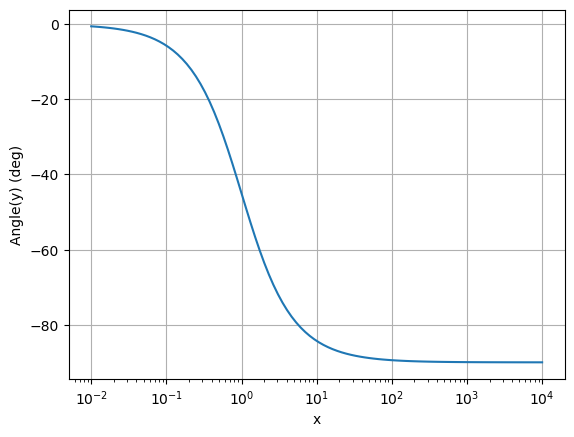

In [20]:
# Step 3: Make the semilogx and loglog plots

#  Phase is good plot with x on a log scale and phase angle on a linear scale.
yphase = np.angle(y, deg=True)
plt.semilogx(x,yphase)
plt.xlabel("x")
plt.ylabel("Angle(y) (deg)")
plt.grid()

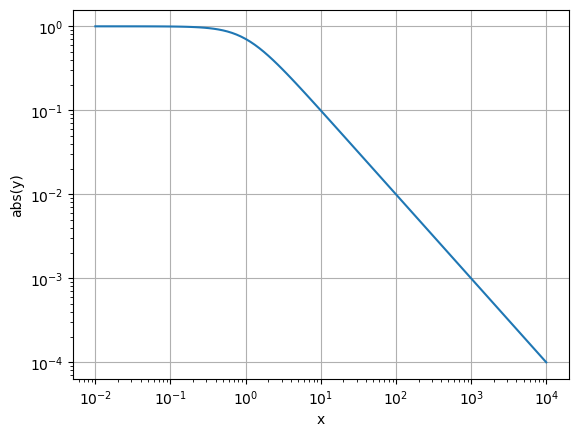

In [21]:
# Step 4: Make the log-log plot
# The absolute value of y  is good to plot with both x and y axes on a logarithmic scale
yabs = np.abs(y)
plt.loglog(x,yabs)
plt.xlabel("x")
plt.ylabel("abs(y)")
plt.grid()

# Task 2: Make a theory plot of reactance vs frequency (2 pts)
Reactance for a capacitor is analogous to Ohm's law. It is the ratio of the voltage to the current, and it depends on the frequency of oscillation. 

$$ X_C = \frac{1}{\omega C} = \frac{1}{2\pi f C}$$

Using reactance to relate current to voltage is similar to Ohm's law, but also involves a phase shift indicated by the imaginary $j$: 

$$V_C = (-j X_C) I_C = \left(-j \frac{1}{\omega C}\right) I_C = \left(-j \frac{1}{2\pi f C}\right) I_C = Z_C I_C$$

**Make plots of the complex valued impedance**, $Z_C$. Make separate plots for the absolute value and phase vs frequency (similar to examples above) where $$Z_C = V_C/I_C = -j \frac{1}{2\pi f C}$$ 

   * Use $C$ = 10 nF (same as the circuit you will build). Use a frequency range of $10^2$ Hz up to $10^6$ Hz. 
   * Make the plots similar to examples above, use the appropriate semilog or log-log axes. 


# Task 3: Build an RC circuit, collect data (2 pts)
![Lab 4 RC  circuit diagram](Fig_RC_Task3.png)
The circuit values are chosen are chosen so that the range of drive frequencies can span a wide range.

1. Build the RC circuit.
1. Use the Signal Generator (W1) as the sinusoidal voltage source
    * Set to **sine wave**. 
    * A 5 V amplitude (max possible) is beneficial for our measurements today to give us an easier time measuring voltages that get smaller at either high or low frequencies. 
    * 1 kHz is fine.
1. Use both channels of the oscilloscope (1+/1- and 2+/2-) to simultaneously measure the voltage *across* the capacitor $V_C$ and *across* the resistor $V_R$.
1. Use the **cursors** in Scopy to measure the time shift of $V_C$ relative to $V_R$. Take a screenshot of your cursors.
1. Use the **Math functions** in Scopy to measure $V_{pp}$ of the capacitor and the resistor.
1. Based on your measurements, compute the following 
    * the peak-to-peak amplitude of the current 
    * the capacitive reactance $X_C = V_C/I$
    * the phase difference (in degrees) between $V_C$ and $V_R$ (or $I$).  Does it show the expected 90 degree phase difference? 

**Do calculations in Python. You can add cells into this Jupyter notebook. Screenshots of calculations and other work go in OneNote**

# Task 4: Frequency dependent impedance of a capacitor (2 pts)
This task extends the analysis of the previous task to multiple frequencies. The goal is to make measurements that verify the complex-valued impedance formula for a capacitor.

$$ X_C = \frac{1}{\omega C} = \frac{1}{2\pi f C}$$

Because $X_C$, relates current to voltage similar to Ohm's law, we have 

$$V_C = (-j X_C) I_C = \left(-j \frac{1}{\omega C} \right) I_C = \left( -j \frac{1}{2\pi f C}\right) I_C = Z_C I_C$$

#### We will be able to test 3 main features of this formula:
* The imaginary $j$ means the sinusoidal voltage across capacitor is 90 degrees behind of the sinusoidal current. There is a 90 degree phase shift between them.
* The magnitude of impedance decreases like $1/\omega$
* The magnitude is inversely proportional to capacitance $C$

#### Suggested steps

1. Calculate the frequency (in Hz) where the capacitive reactance $X_C$ has the same magnitude value as the resistance $R$. We will call this $f_{RC}$.  
1. Select drive frequencies that span well below $f_{RC}$ to a bit above. I picked values approximately $0.01 f_{RC}$ up to $10f_{RC}$. Use a log-scale for spacing frequencies, such as 100, 300, 1000, 3000, and so on up to 100000.
1. Measure the time-shift between the two waves and use the cursors to measure the $\Delta t$
1. Measure the amplitude of the Ch1 and Ch2 sine waves. $V_{pp}$ - peak-to-peak amplitude is a good choice. It can be read using the "Measurement tools
1. Make a table of the measurements 
    * I recommend making a CSV file, either as a Google Sheet or directly in a text file. Then import the CSV file using `genfromtxt`so you have the data in a numpy array.
1. Based on your measurements, compute the following at each frequency
    * the current 
    * the magnitude of the capacitive impedance
    * Compute the phase between $V_C$ and $V_R$. 
1.  Similar to this example, create a pair of plots showing data and theory for
    * phase shift between $I$ and $V_C$ versus frequency (in Hz) (the phase angle of $Z$)
    * The reactance $X_C$ vs frequency (in Hz) 
    
#### Example data table for this task.
You can directly create a CSV file in a text file, such as. 
![Example data](Fig_Task3_data_table.png)

Note the use of logarithmic scales on the plots with [`plt.semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html) and [`plt.loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html).
![Example data table](example_XC_plots.png)

    
**Do calculations in Python. You can add cells into this Jupyter notebook. Screenshots of calculations and other work go in OneNote**

# Task 5: Frequency dependence of the inductor (2 pts)
![RL circuit for measuring impedance of inductor](Fig_RL_Task4.png)

This is similar to Task 3, but for the inductor. The goal is to make measurements that demonstrate the complex-valued impedance formula for an inductor.

$$ X_L = \omega L = 2\pi f L $$

Because $X_L$, relates current to voltage similar to Ohm's law, we have 

$$V_L = (j X_L) I_L = (j \omega L) I_L = (j 2 \pi f L) I_L = Z_L I_L $$

#### We will be able to test 3 main features of this formula:
* The imaginary $j$ means the sinusoidal voltage across inductor is 90 degrees ahead of the sinusoidal current. There is a 90 degree phase shift between them.
* The magnitude of impedance increases with $\omega$
* The magnitude is proportional to inductance $L$
* The formula breaks down for small $\omega$ because the inductor is not ideal

#### Suggested steps
1. Build the circuit. 
1. Calculate the frequency (in Hz) where should $X_L$ and $R$ have the save value.
1. Select drive frequencies that span well below to a little above $f_{RL} = 1/\tau_{RL}$ where $\tau_{RL}=L/R$ . I picked frequencies using a log scale (so 100, 300, 1000, etc).
1. Use the cursors to measure the $\delta t$ between the Voltage across the inductor and resistor. Note which is leading.
1. Measure the peak-to-peak amplitude $V_{pp}$ is a good choice.
1. Make a table of the measurements 
    * I recommend making a CSV file, either as a Google Sheet or directly in JupyterHub. Then use `np.genfromtxt` to load the CSV file into a numpy array.
1. Based on your measurements, compute the following 
    * the current 
    * the magnitude of the capacitive impedance
    * the phase phase
1.  Similar to the example below, create a pair of subplots showing theory and data for
    * phase shift between $I$ and $V_L$ versus frequency (the phase of $Z$)
    * The inductive reactance $X_L$ vs frequency (the absolute value of $Z$)
1. Answer the following questions:
    * How does the intrinsic resistance of the inductor change the two graphs?
    * Does the intrinsic resistance matter more at high or low frequencies? Why?
#### Example data from this task (note your frequencies will be different because this was taken for a 100 Ohm resistor)
![Example data](example_XL_plots.png)
    
**Do calculations in Python. You can add cells into this Jupyter notebook. Screenshots of calculations and other work go in OneNote**